<h1 align="center">Tilastollinen Päättely 2, Demo 3</h1>

<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

<h3 align="left">Tehtävä 1</h3>

R: Tilastotieteessä halutaan usein tarkastella graafisesti, ovatko havainnot jostain parametrisesta jakaumasta, kuten esim. eksponenttisesta jakaumasta tai normaalijakaumasta.

Tähän käytetään Q-Q-kvuiota, jossa y-akselilla on järjestetyt havainnot $\, x_{(1)},...,x_{(n)} \,$ ja x-akselilla on parametrisen jakauman p %:n kvantiileja siten, että p saa seuraavat arvot:

$$ \frac{1}{n+1}, \, \frac{2}{n+1} \, ,..., \, \frac{n}{n+1}. $$

Nämä kvantiilit saadaan parametrisen kertymäfunktion käänteisfunktion avulla:

$$ F^{-1} \left(\frac{j}{n+1} \right) \quad ,\text{missä} \, \, j=1,...,n. $$

Tee oman funktio, jonka avulla voidaan tarkastella, ovatko havainnot peräisin normaalijakaumasta.

In [2]:
def draw_qqplot(x):
    n = len(x)
    x_sorted = np.sort(x)    # Järjestetyt havainnot x1,...,xn
    p = np.arange(1, n+1) / (n+1)    
    normkvan = scipy.stats.norm.ppf(p, loc=np.mean(x), scale=np.std(x))    # Kvantiilit
    plt.figure(dpi=100)
    plt.axes().set_aspect("equal", "box")
    
    # marker='0' saa aikaan sen, ettei plotata lineplottia, vaan piirretään dotteja,
    # kuten R:n koodi tekee.
    # However, jos ei määritetä linestyle='' (eli tyhjä),
    # niin python piirtää edelleen lineplotin markkerien läpi.
    # linestyle='' saa siis aikaan sen, että viivaplotti poistetaan.
    plt.plot(normkvan, x_sorted, marker='o', linestyle='', color='black', alpha=0.5)
    
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    
    # Tämä vastaa R:ssä abline(0, 1), eli piirretään diagonaalille viiva y=x
    plt.plot([-4, 4], [-4, 4], '-', color="black")
    
    plt.plot()

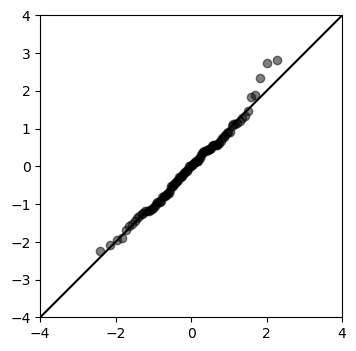

In [3]:
x1 = np.random.normal(loc=0, scale=1, size=100)
draw_qqplot(x1)

<br>

<br>

<h3 align="left">Tehtävä 2</h3>

Simuloi havaintoja $\, X_1,...,X_n \,$ tasajakaumasta Tas(0, $\theta_0)$ otoskoilla n = 10, 30, 300 siten, että simulointien määrä on m=1000 ja $\, \theta_0 = 2. \,$ Laske jokaisesta simulaatiosta $\, \hat{\theta}_n = X_{(n)} \,$ (maksimiarvo) ja $\, \sqrt{n} \, (\hat{\theta}_n - \theta_0). \,$ Havainnoi simulointia graafisesti.

In [4]:
def simulate_uniform_distr(nsim, n, theta):
    
    thetas_CLT = []
    
    # Simuloidaan 1000 (parametrin nsim verran) otosta tasajakaumasta Tas(0, theta) otoskoolla n
    for _ in range(nsim):
        X = np.random.uniform(0, theta, size=n)
        
        # Otetaan jokaisesta simulaatiosta maksimiarvo talteen
        # (tätä käytetään alla olevassa keskeisen raja-arvolauseen laskussa)
        theta_hat = np.max(X)
        
        # Tämä lasku liittyy keskeisen raja-arvolauseen nojalla kertymäfunktion 
        # sqrt(n) * (\bar{X}_n - mu) konvergoitumiseen kohti N(0, sigma^2) -jakaumaa
        # (ks. central limit theorem, wikipedia tai luentomoniste). 
        theta_hat_sqrt = np.sqrt(n) * (theta_hat - theta)
        thetas_CLT.append(theta_hat_sqrt)  
        
    return thetas_CLT

Piirretään simulointikokeen tulokset graafisesti.

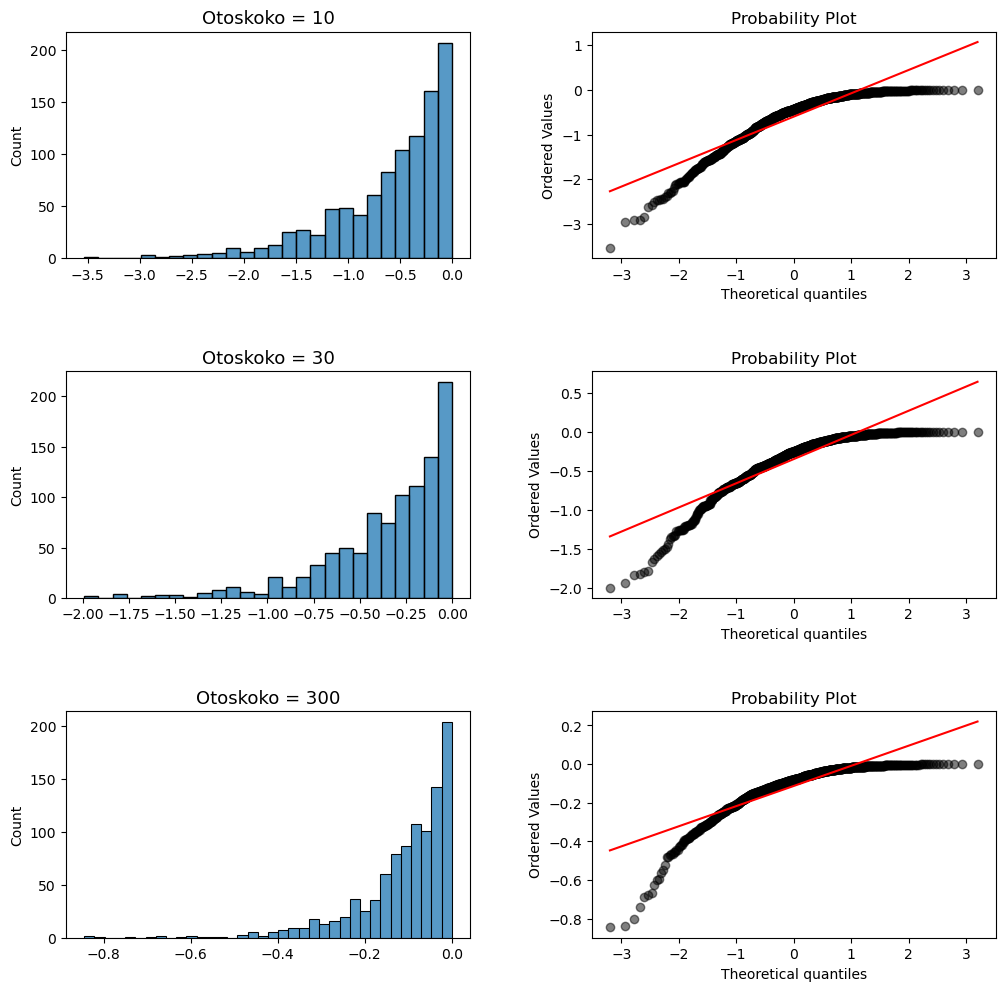

In [33]:
suureet_n10 = simulate_uniform_distr(1000, 10, 2)
suureet_n30 = simulate_uniform_distr(1000, 30, 2)
suureet_n300 = simulate_uniform_distr(1000, 300, 2)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12), dpi=100)

# PLOTATAAN SUUREET OTOSKOOLLA n=10

# ax -parametrin avulla voidaan määrittää, mihin kohtaan subplottia seaborn-plot laitetaan.
sns.histplot(suureet_n10, ax=axs[0, 0])
axs[0, 0].set_title("Otoskoko = 10", size=13)

# Q-Q plotin paikka subplotissa määritetään plot -parametrin avulla.
scipy.stats.probplot(suureet_n10, dist="norm", plot=axs[0, 1])

# get_lines() accesses the tuple object (or some indexable object) of the probability plot.
# get_lines()[0] accesses the DOT object, which can then be modified
# (tässä vaihdoin dottien väriä ja säädin niiden läpinäkyvyyttä)
axs[0, 1].get_lines()[0].set_color('black')  
axs[0, 1].get_lines()[0].set_alpha(0.5) 

# get_lines[1] accesses the LINE object, which can then be modified (tässä vaihdoin käyrän väriä).
axs[0, 1].get_lines()[1].set_color('red')


# PLOTATAAN SUUREET OTOSKOOLLA n=30.

sns.histplot(suureet_n30, ax=axs[1, 0])
axs[1, 0].set_title("Otoskoko = 30", size=13)

scipy.stats.probplot(suureet_n30, dist="norm", plot=axs[1, 1])
axs[1, 1].get_lines()[0].set_color('black')  
axs[1, 1].get_lines()[0].set_alpha(0.5)
axs[1, 1].get_lines()[1].set_color('red')


# PLOTATAAN SUUREET OTOSKOOLLA n=300
sns.histplot(suureet_n300, ax=axs[2, 0])
axs[2, 0].set_title("Otoskoko = 300", size=13)

scipy.stats.probplot(suureet_n300, dist="norm", plot=axs[2, 1])
axs[2, 1].get_lines()[0].set_color('black')  
axs[2, 1].get_lines()[0].set_alpha(0.5)
axs[2, 1].get_lines()[1].set_color('red')

# Säädetään kuvioiden välejä manuaalisesti vertikaali- ja horisontaalisuunnissa.
fig.subplots_adjust(wspace=0.3, hspace=0.5);

- Huomataan, että tasajakauman kohdalla asymptoottinen normaalisuus ei ole voimassa (tasajakauma ei lähesty normaalijakaumaa otoskoon kasvaessa), mikä johtuu siitä, että parametri θ ei ole parametriavaruuden sisäpiste (säännöllisyysehto ei ole voimassa).

<br>

<br>

<h3 align="left">Tehtävä 3</h3>

Laske aineistosta expmiss.dat parametrin **α** suurimman uskottavuuden estimaatti, suurimman uskottavuuden estimaattorin keskivirhe ja 95 %:n luottamusväli.

$$ \hat{a} = -log \left(\frac{m}{\sum_{i=1}^{m} x_i} \right) $$


$$ s.e.(\hat{a}) = \sqrt{-H^{-1} (\hat{a})_{11}} = \sqrt{\frac{1}{m}} \, \, \, \, \, \, \, \, \, \, \, \, \, (H = Hessen \, \, matriisi) $$


Luottamusväli saadaan kaavalla
$$ \hat{a} \pm 1.96 \, \cdot \, s.e.(\hat{a}) $$

In [6]:
df = pd.read_csv("C:/Users/testi/Desktop/Statistical_Inference2/expmiss.csv", index_col=0)

In [7]:
df.head()

,x
1,NaN
2,0.408666
3,1.134624
4,NaN
5,NaN


In [8]:
len(df)

50

In [9]:
df.dtypes

x    float64
dtype: object

In [10]:
df.isna().sum()

x    21
dtype: int64

In [11]:
# Poistetaan puuttuvat havainnot
df = df.dropna()

In [12]:
m = len(df)
m

29

In [13]:
# Suurimman uskottavuuden estimaatti
hat_alfa = -np.log(m/(sum(df["x"])))
hat_alfa

-0.30432742105706445

In [14]:
# Suurimman uskottavuuden estimaattorin keskivirhe
se_hat_alfa = np.sqrt(1/m)
se_hat_alfa

0.18569533817705186

In [15]:
# Parametrin alfa likimääräinen 95%:n luottamusväli
lower_ci = hat_alfa - 1.96 * se_hat_alfa
upper_ci = hat_alfa + 1.96 * se_hat_alfa
CI = pd.DataFrame({"Lower limit": [lower_ci],
                   "Upper limit": [upper_ci]})
CI

,Lower limit,Upper limit
0,-0.66829,0.059635
